# A Demonstration of Horn's Parallel Analysis in PCA using R package paran.

# Further reading: Permutation Parallel Analysis
## Buja A and Eyuboglu N. (1992) Remarks on parrallel analysis. Multivariate Behavioral Research, 27(4), 509-540


In [2]:
install.packages('paran')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
# load Horn's Parallel Analysis package
library('paran')

Loading required package: MASS



In [4]:
# USArrests dataset, contains crime rates of 4 crimes (columns) in 50 states (rows)
dim(USArrests)
USArrests

[1] 50  4

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [7]:
# ## The variances of the variables in the
## USArrests data vary by orders of magnitude, so scaling is appropriate
# apply PCA - scale. = TRUE is highly
# advisable, but default is FALSE.
usa.pca <- prcomp(USArrests, center = TRUE, scale. = TRUE)

In [8]:
# The first component dominates:
summary(usa.pca)
#Importance of components:
#                           PC1      PC2    PC3     PC4
#Standard deviation     83.7324 14.21240 6.4894 2.48279
#Proportion of Variance  0.9655  0.02782 0.0058 0.00085
#Cumulative Proportion   0.9655  0.99335 0.9991 1.00000

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.5749 0.9949 0.59713 0.41645
Proportion of Variance 0.6201 0.2474 0.08914 0.04336
Cumulative Proportion  0.6201 0.8675 0.95664 1.00000

Standard deviations (1, .., p=4):
[1] 1.5748783 0.9948694 0.5971291 0.4164494

Rotation (n x k) = (4 x 4):
                PC1        PC2        PC3         PC4
Murder   -0.5358995 -0.4181809  0.3412327  0.64922780
Assault  -0.5831836 -0.1879856  0.2681484 -0.74340748
UrbanPop -0.2781909  0.8728062  0.3780158  0.13387773
Rape     -0.5434321  0.1673186 -0.8177779  0.08902432


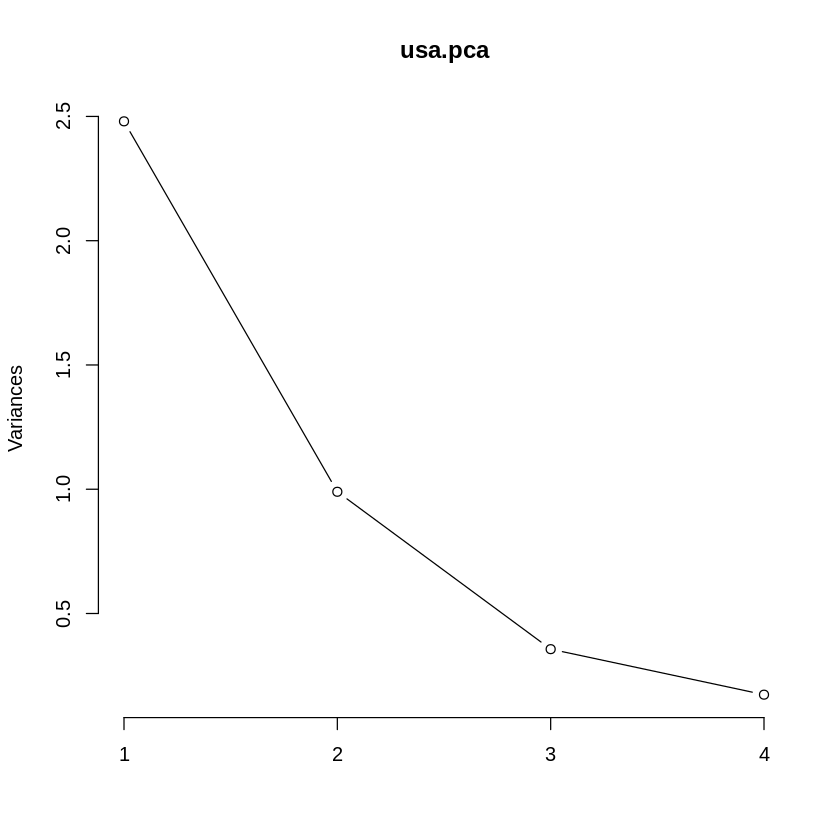

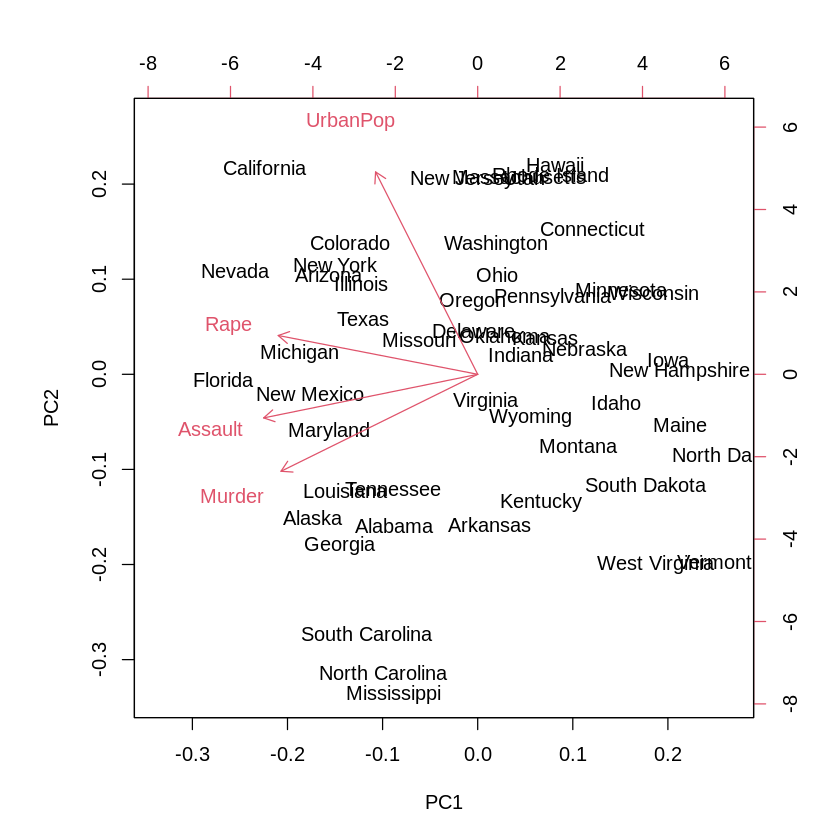

In [9]:
print(usa.pca)
plot(usa.pca,type='l')
biplot(usa.pca)

In [10]:
# Horn's parallel analysis, which only picks up the PC1
## perform a standard parallel analysis on the US Arrest data
usa.paran<-paran(USArrests, iterations=5000)
names(usa.paran)


Using eigendecomposition of correlation matrix.
Computing: 10%  20%  30%  40%  50%  60%  70%  80%  90%  100%


Results of Horn's Parallel Analysis for component retention
5000 iterations, using the mean estimate

-------------------------------------------------- 
Component   Adjusted    Unadjusted    Estimated 
            Eigenvalue  Eigenvalue    Bias 
-------------------------------------------------- 
1           2.154153    2.480241      0.326087
-------------------------------------------------- 

Adjusted eigenvalues > 1 indicate dimensions to retain.
(1 components retained)



[1] "Retained" "AdjEv"    "Ev"       "RndEv"    "Bias"     "SimEvs"

In [11]:
## a conservative analysis with different result!
usa.paran1<-paran(USArrests, iterations=5000, centile=95)
names(usa.paran1)


Using eigendecomposition of correlation matrix.
Computing: 10%  20%  30%  40%  50%  60%  70%  80%  90%  100%


Results of Horn's Parallel Analysis for component retention
5000 iterations, using the 95 centile estimate

-------------------------------------------------- 
Component   Adjusted    Unadjusted    Estimated 
            Eigenvalue  Eigenvalue    Bias 
-------------------------------------------------- 
1           1.959272    2.480241      0.520969
-------------------------------------------------- 

Adjusted eigenvalues > 1 indicate dimensions to retain.
(1 components retained)



[1] "Retained" "AdjEv"    "Ev"       "RndEv"    "Bias"     "SimEvs"

In [14]:
# PCA of S&P 500 stock data
load(file='snp500.Rda')

[1] 1257  452

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     0.1957 0.09444 0.08716 0.07106 0.06283 0.05978 0.05023
Proportion of Variance 0.1604 0.03736 0.03182 0.02115 0.01653 0.01497 0.01057
Cumulative Proportion  0.1604 0.19779 0.22961 0.25076 0.26730 0.28227 0.29284
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.04886 0.04761 0.04572 0.04491 0.04438 0.04390 0.04299
Proportion of Variance 0.01000 0.00949 0.00876 0.00845 0.00825 0.00807 0.00774
Cumulative Proportion  0.30284 0.31233 0.32109 0.32954 0.33778 0.34586 0.35360
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     0.04263 0.04229 0.04156 0.04115 0.04061 0.04012 0.03941
Proportion of Variance 0.00761 0.00749 0.00724 0.00709 0.00691 0.00674 0.00651
Cumulative Proportion  0.36121 0.36870 0.37594 0.38303 0.38994 0.39668 0.40319
                          PC22

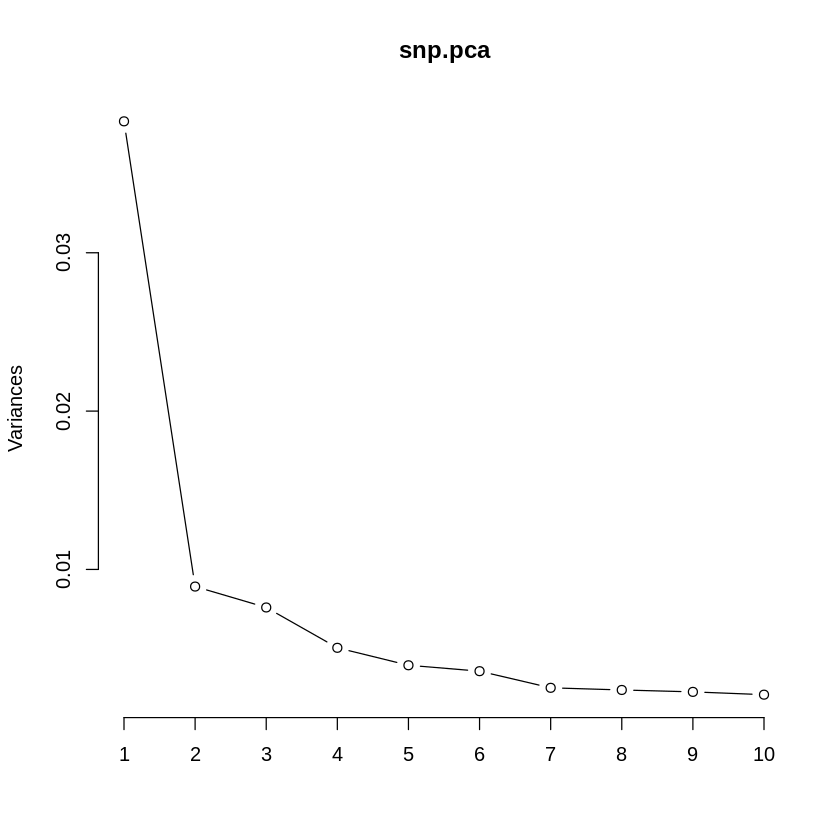

In [15]:
X<-diff(log(stockdata$data),1);
names<-stockdata$info;
dim(X)
snp.pca<-prcomp(X, center = TRUE)
summary(snp.pca)
plot(snp.pca,type='l')

In [16]:
# 14 PCs are kept using Horn's parallel analysis
snp.paran<-paran(X,iterations=100)
# Be patient, it may take a while ...


Using eigendecomposition of correlation matrix.
Computing: 10%  20%  30%  40%  50%  60%  70%  80%  90%  100%


Results of Horn's Parallel Analysis for component retention
100 iterations, using the mean estimate

-------------------------------------------------- 
Component   Adjusted    Unadjusted    Estimated 
            Eigenvalue  Eigenvalue    Bias 
-------------------------------------------------- 
1          97.597360   99.124666      1.527306
2          12.066463   13.557119      1.490655
3          9.541131   11.001405      1.460274
4           5.023699    6.459118      1.435418
5           4.228739    5.641750      1.413010
6           2.848647    4.240575      1.391928
7           2.377144    3.749708      1.372564
8           2.104138    3.458693      1.354554
9           1.626897    2.964472      1.337575
10          1.324396    2.643705      1.319309
11          1.162678    2.466882      1.304203
12          1.110772    2.401005      1.290232
13          1.062264    2.3